In [2]:
#!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.9 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.3/772.3 kB 6.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 1.7 MB/s eta 0:00:00ta 0:00:01


In [1]:
import nltk  #영어 코퍼스에 토큰화와 품사 태깅 전처리를 진행한 문장 데이터 획득
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [6]:
#nltk.download('treebank')

[nltk_data] Downloading package treebank to /home/kjw/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

In [2]:
# 토큰화에 품사 태깅이 된 데이터 받아오기
tagged_sentences = nltk.corpus.treebank.tagged_sents()
print(f"품사 태깅이 된 문장 개수: {len(tagged_sentences)}")

품사 태깅이 된 문장 개수: 3914


In [3]:
print(tagged_sentences[0])

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]


In [4]:
sentences, pos_tags=[], []
test_sample=tagged_sentences[0]
test_sentence, test_tag=zip(*test_sample)
for tagged_sentence in tagged_sentences:
        #각 문장에서 단어는 단어끼리, 품사는 품사끼리 묶어 변수에 저장
        sentence, tag_info=zip(*tagged_sentence) 
        sentences.append(list(sentence))
        pos_tags.append(list(tag_info))


In [5]:
print(sentences[0])
print(pos_tags[0])

['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.']
['NNP', 'NNP', ',', 'CD', 'NNS', 'JJ', ',', 'MD', 'VB', 'DT', 'NN', 'IN', 'DT', 'JJ', 'NN', 'NNP', 'CD', '.']


샘플의 최대 길이: 271
샘플의 평균 길이: 25.722023505365357


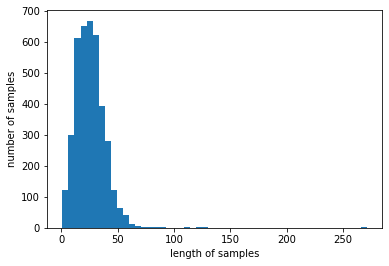

In [6]:
print(f'샘플의 최대 길이: {max(len(l) for l in sentences)}')
print(f'샘플의 평균 길이: {(sum(map(len, sentences))/len(sentences))}')
plt.hist([len(s) for s in sentences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [7]:
def tokenize(samples):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(samples)
  return tokenizer

In [8]:
src_tokenizer = tokenize(sentences)
tar_tokenizer = tokenize(pos_tags)

In [9]:
vocab_size=len(src_tokenizer.word_index)+1
tag_size=len(tar_tokenizer.word_index)+1
print(f'단어 집합의 크기 : {vocab_size}')
print(f'태깅 정보 집합의 크기 : {tag_size}')

단어 집합의 크기 : 11388
태깅 정보 집합의 크기 : 47


In [10]:
X_train = src_tokenizer.texts_to_sequences(sentences)
y_train = tar_tokenizer.texts_to_sequences(pos_tags)
print(X_train[:2])
print(y_train[:2])

[[5601, 3746, 1, 2024, 86, 331, 1, 46, 2405, 2, 131, 27, 6, 2025, 332, 459, 2026, 3], [31, 3746, 20, 177, 4, 5602, 2915, 1, 2, 2916, 637, 147, 3]]
[[3, 3, 8, 10, 6, 7, 8, 21, 13, 4, 1, 2, 4, 7, 1, 3, 10, 9], [3, 3, 17, 1, 2, 3, 3, 8, 4, 3, 19, 1, 9]]


In [11]:
max_len = 150
X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
y_train = pad_sequences(y_train, padding='post', maxlen=max_len)
print(X_train[0])
print(y_train[0])

[5601 3746    1 2024   86  331    1   46 2405    2  131   27    6 2025
  332  459 2026    3    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0]
[ 3  3  8 10  6  7  8 21 13  4  1  2  4  7  1  3 10  9  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, 
                                                    test_size=.2, 
                                                    random_state=777)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                    test_size=.2, 
                                                    random_state=777)
print(f'훈련 샘플 문장의 크기: {X_train.shape}')
print(f'훈련 샘플 레이블의 크기: {y_train.shape}')
print(f'검증 샘플 문장의 크기: {X_val.shape}')
print(f'검증 샘플 레이블의 크기: {y_val.shape}')
print(f'테스트 샘플 문장의 크기: {X_test.shape}')
print(f'테스트 샘플 레이블의 크기: {y_test.shape}')

훈련 샘플 문장의 크기: (2504, 150)
훈련 샘플 레이블의 크기: (2504, 150)
검증 샘플 문장의 크기: (627, 150)
검증 샘플 레이블의 크기: (627, 150)
테스트 샘플 문장의 크기: (783, 150)
테스트 샘플 레이블의 크기: (783, 150)


2022-10-03 21:21:17.690928: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-03 21:21:17.696580: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-03 21:21:17.696988: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-03 21:21:17.697670: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/50


2022-10-03 21:21:24.331506: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100


20/20 [==============================] - 8s 121ms/step - loss: 0.6152 - accuracy: 0.1478 - val_loss: 0.5244 - val_accuracy: 0.1416
Epoch 2/50
20/20 [==============================] - 0s 23ms/step - loss: 0.5180 - accuracy: 0.1607 - val_loss: 0.4887 - val_accuracy: 0.1919
Epoch 3/50
20/20 [==============================] - 0s 21ms/step - loss: 0.4864 - accuracy: 0.2591 - val_loss: 0.4518 - val_accuracy: 0.3848
Epoch 4/50
20/20 [==============================] - 0s 20ms/step - loss: 0.4259 - accuracy: 0.4348 - val_loss: 0.3638 - val_accuracy: 0.4771
Epoch 5/50
20/20 [==============================] - 0s 21ms/step - loss: 0.3188 - accuracy: 0.5383 - val_loss: 0.2597 - val_accuracy: 0.6290
Epoch 6/50
20/20 [==============================] - 0s 19ms/step - loss: 0.2201 - accuracy: 0.6997 - val_loss: 0.1797 - val_accuracy: 0.7596
Epoch 7/50
20/20 [==============================] - 0s 21ms/step - loss: 0.1406 - accuracy: 0.8325 - val_loss: 0.1206 - val_accuracy: 0.8430
Epoch 8/50
20/20 [=====

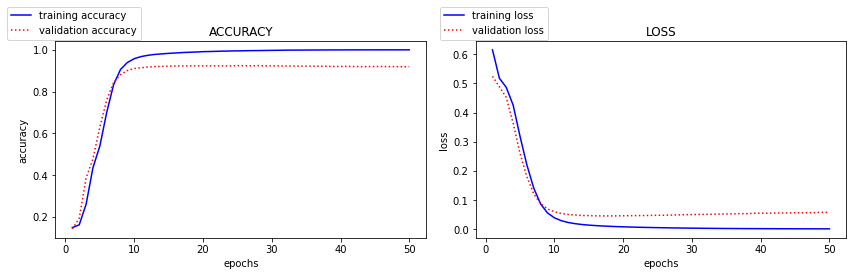

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, InputLayer, Embedding
from tensorflow.keras.layers import Bidirectional, TimeDistributed
from tensorflow.keras.optimizers import Adam

embedding_dim = 128
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, mask_zero=True))
model.add(Bidirectional(LSTM(hidden_units, return_sequences=True)))
model.add(TimeDistributed(Dense(tag_size, activation=('softmax'))))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=Adam(0.001), 
              metrics=['accuracy'])
history= model.fit(X_train, y_train, batch_size=128, 
                   epochs=50, validation_data=(X_val, y_val))
print("테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

def vis(history,name) :
    plt.title(f"{name.upper()}")
    plt.xlabel('epochs')
    plt.ylabel(f"{name.lower()}")
    value = history.history.get(name)
    val_value = history.history.get(f"val_{name}",None)
    epochs = range(1, len(value)+1)
    plt.plot(epochs, value, 'b-', label=f'training {name}')
    if val_value is not None :
        plt.plot(epochs, val_value, 'r:', label=f'validation {name}')
    plt.legend(loc='upper center', bbox_to_anchor=(0.05, 1.2) , 
               fontsize=10 , ncol=1)
    
def plot_history(history) :
    key_value = list(set([i.split("val_")[-1] for i in list(history.history.keys())]))
    plt.figure(figsize=(12, 4))
    for idx , key in enumerate(key_value) :
        plt.subplot(1, len(key_value), idx+1)
        vis(history, key)
    plt.tight_layout()
    plt.show()

plot_history(history)



In [14]:
index_to_word = src_tokenizer.index_word
index_to_tag = tar_tokenizer.index_word

i = 30 # 확인하고 싶은 테스트용 샘플의 인덱스.

# 입력한 테스트용 샘플에 대해서 예측값 y를 리턴
y_predicted = model.predict(np.array([X_test[i]])) 

# 확률 벡터를 정수 레이블로 변환.
y_predicted = np.argmax(y_predicted, axis=-1) 

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for word, tag, pred in zip(X_test[i], y_test[i], y_predicted[0]):
    if word != 0: # PAD값은 제외함.
        print("{:17}: {:7} {}".format(index_to_word[word], 
                                      index_to_tag[tag].upper(), 
                                      index_to_tag[pred].upper()))

단어             |실제값  |예측값
-----------------------------------
some             : DT      DT
of               : IN      IN
the              : DT      DT
surge            : NN      NN
in               : IN      IN
the              : DT      DT
stock            : NN      NN
's               : POS     POS
price            : NN      NN
appeared         : VBD     VBD
*-1              : -NONE-  -NONE-
to               : TO      TO
be               : VB      VB
linked           : VBN     VBN
*-39             : -NONE-  -NONE-
to               : TO      TO
revived          : VBN     VB
takeover         : NN      NN
speculation      : NN      NN
,                : ,       ,
which            : WDT     WDT
*t*-28           : -NONE-  -NONE-
has              : VBZ     VBZ
contributed      : VBN     VBN
to               : TO      TO
volatility       : NN      NN
of               : IN      IN
campbell         : NNP     NNP
shares           : NNS     NNS
in               : IN      IN
recent           : 